# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [11]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


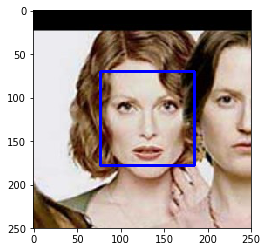

In [12]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[40])
# img = cv2.imread('pizza-slice.jpg')
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [13]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

Accuracy on human faces in %: 98.0% . This means that out of first 100 images in human_files, 98 images have a detected human face
Accuracy on dog faces in %: 17.0% . This means that out of first 100 images in human_files, 17 images are detected as a human while 83 images are correctly identified as not human faces.

In [14]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

human_face_total=0
dogs_total=0

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

for images in human_files_short:
    human_face_total+= face_detector(images)
    
human_accuracy = human_face_total/len(human_files_short)
print('Accuracy on human faces in %:', human_accuracy*100)

for images in dog_files_short:
    dogs_total+= face_detector(images)
    
dog_accuracy = dogs_total/len(dog_files_short)
print('Accuracy on dog faces in %:', dog_accuracy*100)


Accuracy on human faces in %: 98.0
Accuracy on dog faces in %: 17.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [15]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [16]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [17]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = Image.open(img_path)
    #img = Image.open(human_files[0])
    #img1 = cv2.imread(human_files[0])
    #plt.imshow(img)
    #plt.imshow(img1)
    
    #Resize
    left_margin = (img.width-224)/2
    bottom_margin = (img.height-224)/2
    right_margin = left_margin + 224
    top_margin = bottom_margin + 224
    img = img.crop((left_margin, bottom_margin, right_margin, top_margin))
    
    #plt.imshow(img)
    
    #Normalize
    img=np.array(img)/255
    mean = np.array([0.485, 0.456, 0.406]) #provided mean for ImageNet Dataset
    std = np.array([0.229, 0.224, 0.225])  #provided standard deviation for ImageNet dataset
    img = (img-mean)/std
    
    #plt.imshow(img)
    #print(img.shape)
    
    img = img.transpose((2, 0, 1)) ## Makes the dimension from torch.Size([224,224,3]) to torch.Size([3,224,224])
    #img = torch.from_numpy(img).type(torch.cuda.FloatTensor) #AssertionError: Found no NVIDIA driver on your system
    img = torch.from_numpy(img).type(torch.cuda.FloatTensor)
    img.unsqueeze_(0)
    
    ps = torch.exp(VGG16(img))
    top_p,top_class = ps.topk(1,dim=1)
    #print(top_p)
    #print(top_class)
    #print(top_p.shape,top_class.shape)
    
    
    return top_class.data.cpu().numpy()[0] # predicted class index

In [7]:
idx = VGG16_predict('pizza.jpg')
print(idx)

[957]


In [8]:
idx1 = VGG16_predict('pizza-slice.jpg')
print(idx1)

[963]


In [10]:
idx = VGG16_predict('parachute.jpg')
print(idx)

[701]


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [18]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    if(VGG16_predict(img_path)>=151 and VGG16_predict(img_path)<=268):
        print(VGG16_predict(img_path))
        return True # true/false
    print(VGG16_predict(img_path))
    return False 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__
We get both the percentage of images having a detected dog as 100% using the pre-trained VGG-16 model
Accuracy in dog-files-short is : 91
Accuracy in human-files-short is: 2

Which means that 91% of the dogs in the dog_files_short are correctly classified as dogs according to ImageNet labels and only 2% humans are wrongly classified as dogs. So the model is behaving correctly.

In [19]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
d=0
for images in dog_files_short:
    d+=dog_detector(images)
#accuracy_dogfiles = (d * 100)/(len(dog_files_short)) 
print("Accuracy in dog-files-short is :",d)

h=0
for images in human_files_short:
    h+=dog_detector(images)
print("Accuracy in human-files-short is:",h)

[225]
[243]
[243]
[297]
[243]
[243]
[243]
[243]
[296]
[242]
[243]
[255]
[243]
[243]
[243]
[243]
[243]
[254]
[243]
[210]
[243]
[171]
[243]
[243]
[163]
[246]
[367]
[243]
[243]
[243]
[243]
[243]
[243]
[243]
[243]
[243]
[69]
[159]
[243]
[209]
[254]
[243]
[243]
[243]
[243]
[243]
[208]
[243]
[243]
[246]
[243]
[243]
[245]
[347]
[243]
[243]
[163]
[243]
[236]
[234]
[236]
[246]
[165]
[236]
[236]
[236]
[236]
[236]
[234]
[236]
[236]
[399]
[236]
[236]
[165]
[236]
[236]
[351]
[236]
[168]
[237]
[236]
[165]
[236]
[721]
[236]
[236]
[545]
[236]
[885]
[165]
[236]
[234]
[236]
[236]
[237]
[236]
[227]
[236]
[236]
Accuracy in dog-files-short is : 91
[906]
[456]
[834]
[906]
[862]
[457]
[906]
[906]
[834]
[906]
[834]
[906]
[432]
[834]
[819]
[617]
[617]
[424]
[917]
[617]
[638]
[610]
[860]
[862]
[617]
[683]
[862]
[451]
[834]
[834]
[617]
[400]
[678]
[819]
[906]
[683]
[610]
[834]
[465]
[906]
[903]
[678]
[457]
[834]
[903]
[585]
[903]
[678]
[678]
[459]
[400]
[678]
[917]
[639]
[683]
[678]
[400]
[585]
[683]
[906]
[400]

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [4]:
import os
import torch
import torchvision.models as models
from torchvision import datasets,transforms
from PIL import Image

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


train_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder('/data/dog_images/train', transform=train_transforms) 
test_data = datasets.ImageFolder('/data/dog_images/test', transform=test_transforms) 
valid_data=datasets.ImageFolder('/data/dog_images/valid', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=20, shuffle=True) 
testloader = torch.utils.data.DataLoader(test_data, batch_size=20) 
validloader = torch.utils.data.DataLoader(valid_data, batch_size=20)

loaders = {'train':trainloader,
           'valid':validloader,
           'test':testloader}



**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
1. I have used the following transforms for preprocessing the image
 -- Resize
 -- Random resize crop
 -- Normalization
 
 For resizing, I have picked 255 as the size for the input tensor. First I have resized the image into 255 pixels and then cropped the image to the size of 224 by using Random resize crop or center crop.
The idea behind using this size is that all the standard models accept images of sizes between 224 to 299 for training purpose.The input images can be of varied sizes . So as to bring uniformity in the input dataset, I have cropped it to 224. very large images is difficult to train for a model.And very small images loses all the important spatial features as a result of cropping.

2. I have just applied normalization to the input images. Other than this I haven't used any other augmentation in my final model.
This is because since we are creating our model architecture from scratch, so adding any extra augmentations to the image will make the training complex and the model might not understand the horizontal flips well. This in turn will affect the accuracy of the model.
I have tried using augmentation like horizontal flip,random rotation on my first attempt but I found out that my model was not training well in that case.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [4]:
import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3,32,3,stride=2,padding=1)
        self.conv2 = nn.Conv2d(32,64,3,stride=2,padding=1)
        self.conv3 = nn.Conv2d(64,128,3,padding=1)
        self.conv4 = nn.Conv2d(128,256,2,stride=2,padding=1)
        
        self.pool = nn.MaxPool2d(2)
        self.dropout = nn.Dropout(0.25)
        
        self.fc1 = nn.Linear(4*4*256,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,133)
    
        #self.bn1=nn.BatchNorm1d(1024)
        #self.bn2=nn.BatchNorm1d(512)
        
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=self.pool(F.relu(self.conv3(x)))
        x=F.relu(self.conv4(x))
        
        x=x.view(-1,4*4*256)
        x= F.relu(self.fc1(self.dropout(x)))
        x= F.relu(self.fc2(self.dropout(x)))
        x= self.fc3(self.dropout(x))
                

        
        return x
    
        ### simple model not the alexnet one
        
        

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I have tried to keep a simple architecture with 4 convolutional layers and 3 fully connected layers.
A very deep neural net would not be suitable in case of building a model from scratch.

conv 1 : input image size is 3*224*224
         input_channels = 3(which means depth = 3, rgb image)
         output_channels = 32(number of filters in output)
         kernel size = 3
         stride = 2 (the feature map will be of same size as of image since padding is given)
         padding = 1 (to keep the image size same)
         

conv 2 : 
         input_channels = 32(same as output depth of previous layer)
         output_channels = 64(number of filters in output)
         kernel size = 3
         stride = 2 
         padding = 1 (to keep the image size same)
         
conv 3 : 
         input_channels = 64
         output_channels = 128(number of filters in output)
         kernel size = 3
         padding = 1 (to keep the image size same)
         
conv 4 : 
         input_channels = 128
         output_channels = 256(number of filters in output)
         kernel size = 3
         stride = 2 (which means the feature map is of same size as of image)
         padding = 1 (to keep the image size same)
         
         
  I am applying ReLU activation function after each convolutional layer and passing it through a max pooling layer too.
  Reason behind using max pooling after each conv layer is : conv layers depth is keeping increasing which means number of parameters increases which adds a lot to the complexity. So to keep the dimension of the layers low, we use max pooling layers.
  
  Then I am defining 3 fully connected layers.
  The first linear layer takes the output of the last convolutional layer as an input. Before passing it to the linear layers we have to flatten the input using view().
  The number of neurons is increased in the pattern of (input ->1024 -> 512 -> number of output classes = 133)
  
  I am adding dropout at each layer so as the model doesnot overfit.
  Then we are passing it through the ReLU activation function so as to keep the output in the range of 0 to 1
  We do not apply relu activation on the last linear layer since we need the output in the form of predicted class.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [5]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(),lr=0.05)

In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [ ]:
import numpy as np
def train(n_epochs,loaders,model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
        
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model 
            output = model(data) 
            # calculate the batch loss 
            loss = criterion(output, target) 
            # backward pass: compute gradient of the loss with respect to model parameters 
            loss.backward() 
            # perform a single optimization step (parameter update) 
            optimizer.step() 
            # update training loss 
            #train_loss += loss.item()*data.size(0) 
            train_loss = train_loss + ((1/(batch_idx + 1)) * (loss.data - train_loss))
            
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data,target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
          
            output = model(data)
        
           
            # calculate the batch loss
            loss = criterion(output,target)
            ## update the average validation loss
            # valid_loss = valid_loss + loss.item() * data.size(0) 
            valid_loss = valid_loss + ((1/(batch_idx + 1)) * (loss.data - valid_loss))
            
          
       ## train_loss = train_loss/len(train_loader.dataset) 
       ## valid_loss = valid_loss/len(valid_loader.dataset)


            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min: 
                print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format( valid_loss_min, valid_loss)) 
                torch.save(model.state_dict(), 'model_scratch.pt') 
                valid_loss_min = valid_loss 
    # return trained model
    return model


# train the model
model_scratch = train(100,loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 3.869210 	Validation Loss: 3.741054
Validation loss decreased (inf --> 3.741054). Saving model ...
Epoch: 2 	Training Loss: 3.820548 	Validation Loss: 3.683960
Validation loss decreased (3.741054 --> 3.683960). Saving model ...
Epoch: 3 	Training Loss: 3.791395 	Validation Loss: 3.624685
Validation loss decreased (3.683960 --> 3.624685). Saving model ...
Epoch: 4 	Training Loss: 3.760970 	Validation Loss: 3.646159
Epoch: 5 	Training Loss: 3.705446 	Validation Loss: 3.637205
Epoch: 6 	Training Loss: 3.703131 	Validation Loss: 3.581640
Validation loss decreased (3.624685 --> 3.581640). Saving model ...
Epoch: 7 	Training Loss: 3.654849 	Validation Loss: 3.597165
Epoch: 8 	Training Loss: 3.630862 	Validation Loss: 3.712820
Epoch: 9 	Training Loss: 3.593205 	Validation Loss: 3.574350
Validation loss decreased (3.581640 --> 3.574350). Saving model ...
Epoch: 10 	Training Loss: 3.575437 	Validation Loss: 3.581498
Epoch: 11 	Training Loss: 3.534998 	Validation Loss: 3

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [9]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx,(data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1/(batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.234585


Test Accuracy: 22% (192/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [20]:
## TODO: Specify data loaders

import os 
import torch 
from torchvision import datasets,transforms
import torchvision.models as models
from PIL import Image


train_transforms = transforms.Compose(
                            [transforms.RandomRotation(30),
                             transforms.Resize(255),
                             transforms.RandomResizedCrop(224), 
                             transforms.RandomHorizontalFlip(), 
                             transforms.ToTensor(), 
                             transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose(
                            [transforms.Resize(255), 
                             transforms.CenterCrop(224), 
                             transforms.ToTensor(), 
                             transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
# Pass transforms in here, then run the next cell to see how the transforms look 
train_data = datasets.ImageFolder('/data/dog_images/train', transform=train_transforms) 
test_data = datasets.ImageFolder('/data/dog_images/test', transform=test_transforms) 
valid_data=datasets.ImageFolder('/data/dog_images/valid', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=20, shuffle=True) 
testloader = torch.utils.data.DataLoader(test_data, batch_size=20)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=20)


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [21]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.densenet201(pretrained = True)

print (model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [15]:
### Freezing the parameters of the pre trained model and just defining the classifier part

for param in model_transfer.parameters():
    param.requires_grad = False
    

In [23]:
use_cuda = torch.cuda.is_available()

In [24]:
##Defining the new classifier keeping in mind the number of output classes we need at the end
model_transfer.classifier = nn.Sequential(nn.Linear(1920,1024),
                                  nn.ReLU(),
                                  nn.Linear(1024,133),
                                  nn.LogSoftmax(dim = 1))

In [25]:
if use_cuda:
    model_transfer = model_transfer.cuda()

In [26]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I have used Densenet201 as my pretrained model to make a classifier to predict the dog breeds.
Densenet201 is a very powerful architecture having 201 hidden layers. It works very well in case of image classification problems.
I have compared 2 architectures - Resnet152  and Densenet201 but densenet worked better in terms of giving accuracy.

First I am freezing the entire model and just redefining the classifier part and training the model to achieve around 87% accuracy. To train the model further, we unfreeze the whole model and start training the entire model having changed weights and biases.
This approach gives a very good accuracy and low validation loss.

Optimizer used is Adam and Loss is calculated using NLLLoss.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [27]:
from torch import optim
criterion_transfer = nn.NLLLoss()
# here we are optimizing only the parameters of the linear classifier since it is freezed model
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(),lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [28]:
# train the model
#model_transfer = # train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

import numpy as np
import time
def train(num_epochs,train_loader,test_loader,model_transfer,optimizer,criterion,use_cuda):
    """Returns trained model"""
    #initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    running_loss = 0
    
    
    for epoch in range(num_epochs):
        for inputs,labels in train_loader:
             
            #Move input and labels to the torch device
            inputs,labels=inputs.cuda(),labels.cuda()
            
            optimizer.zero_grad()
            start=time.time()
            logps=model_transfer(inputs)
            loss = criterion(logps,labels)
            loss.backward()
            optimizer.step()
            
            running_loss=loss.item()
        
        model_transfer.eval()
        valid_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            for inputs,labels in test_loader:
                
                inputs,labels = inputs.cuda(),labels.cuda()
                logps = model_transfer(inputs)
                batch_loss = criterion(logps,labels)
                valid_loss+=batch_loss.item()
                
                #Calculate accuracy
                ps = torch.exp(logps)
                top_p,top_class = ps.topk(1,dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                
            if(valid_loss <= valid_loss_min):
                print("Validation Loss decreased...({:.6f} --> {:.6f}). Saving model ...".format( valid_loss_min, valid_loss))
                torch.save(model_transfer.state_dict(), 'model_transfer.pt')
                valid_loss_min = valid_loss
                
        
            print(f"Device = cuda; Time per batch: {(time.time() - start):.3f} seconds")       
            print(f"Epoch {epoch}/{num_epochs}.. "
                  f"Train loss: {running_loss/len(train_loader):.3f}.. "
                  f"Test loss: {valid_loss/len(test_loader):.3f}.. "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
            running_loss = 0
            model_transfer.train()            
            
        
       
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
    return model_transfer
        
            
# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

In [12]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES=True

In [10]:
# train the model
model_transfer = train(15,trainloader,validloader, model_transfer, optimizer_transfer, criterion_transfer, use_cuda)


Validation Loss decreased...(inf --> 12.574533). Saving model ...
Device = cuda; Time per batch: 23.581 seconds
Epoch 0/15.. Train loss: 0.014.. Test loss: 0.898.. Test accuracy: 0.753
Validation Loss decreased...(12.574533 --> 7.361749). Saving model ...
Device = cuda; Time per batch: 21.565 seconds
Epoch 1/15.. Train loss: 0.017.. Test loss: 0.526.. Test accuracy: 0.837
Validation Loss decreased...(7.361749 --> 7.084388). Saving model ...
Device = cuda; Time per batch: 21.893 seconds
Epoch 2/15.. Train loss: 0.008.. Test loss: 0.506.. Test accuracy: 0.834
Validation Loss decreased...(7.084388 --> 6.775539). Saving model ...
Device = cuda; Time per batch: 21.749 seconds
Epoch 3/15.. Train loss: 0.010.. Test loss: 0.484.. Test accuracy: 0.847
Device = cuda; Time per batch: 21.450 seconds
Epoch 4/15.. Train loss: 0.013.. Test loss: 0.502.. Test accuracy: 0.830
Validation Loss decreased...(6.775539 --> 5.876301). Saving model ...
Device = cuda; Time per batch: 21.839 seconds
Epoch 5/15..

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [10]:
## Now unfreezing the model

for param in model_transfer.parameters():
    param.requires_grad = True



In [13]:
from torch import optim
criterion_transfer = nn.NLLLoss()
# here we are optimizing the whole model (all the parameters) since we have unfreezed the model
# also decreasing the lr
optimizer_transfer = optim.Adam(model_transfer.parameters(),lr=0.00001)

In [12]:
#training the model again
model_transfer = train(5,trainloader,validloader,model_transfer,optimizer_transfer,criterion_transfer,use_cuda)

Validation Loss decreased...(inf --> 8.620313). Saving model ...
Device = cuda; Time per batch: 22.365 seconds
Epoch 0/5.. Train loss: 0.002.. Test loss: 0.319.. Test accuracy: 0.900
Validation Loss decreased...(8.620313 --> 8.074075). Saving model ...
Device = cuda; Time per batch: 22.496 seconds
Epoch 1/5.. Train loss: 0.004.. Test loss: 0.299.. Test accuracy: 0.903
Device = cuda; Time per batch: 22.385 seconds
Epoch 2/5.. Train loss: 0.002.. Test loss: 0.299.. Test accuracy: 0.903
Validation Loss decreased...(8.074075 --> 7.802729). Saving model ...
Device = cuda; Time per batch: 22.545 seconds
Epoch 3/5.. Train loss: 0.002.. Test loss: 0.289.. Test accuracy: 0.904
Device = cuda; Time per batch: 22.193 seconds
Epoch 4/5.. Train loss: 0.002.. Test loss: 0.303.. Test accuracy: 0.903


In [17]:
#training the model again
model_transfer = train(5,trainloader,validloader,model_transfer,optimizer_transfer,criterion_transfer,use_cuda)

Validation Loss decreased...(inf --> 14.381525). Saving model ...
Device = cuda; Time per batch: 22.670 seconds
Epoch 0/5.. Train loss: 0.002.. Test loss: 0.342.. Test accuracy: 0.887
Validation Loss decreased...(14.381525 --> 13.060456). Saving model ...
Device = cuda; Time per batch: 22.578 seconds
Epoch 1/5.. Train loss: 0.003.. Test loss: 0.311.. Test accuracy: 0.890
Device = cuda; Time per batch: 22.744 seconds
Epoch 2/5.. Train loss: 0.001.. Test loss: 0.324.. Test accuracy: 0.892
Device = cuda; Time per batch: 22.792 seconds
Epoch 3/5.. Train loss: 0.001.. Test loss: 0.316.. Test accuracy: 0.890
Validation Loss decreased...(13.060456 --> 12.876797). Saving model ...
Device = cuda; Time per batch: 22.724 seconds
Epoch 4/5.. Train loss: 0.001.. Test loss: 0.307.. Test accuracy: 0.898


In [14]:
loaders = {'train':trainloader,
           'valid':validloader,
           'test':testloader}
import numpy as np

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx,(data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1/(batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.385407


Test Accuracy: 88% (741/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [29]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    
    # load the image and return the predicted breed
    img = Image.open(img_path)
    # Resize
    
    left_margin = (img.width-224)/2
    bottom_margin = (img.height-224)/2
    right_margin = left_margin + 224
    top_margin = bottom_margin + 224
    img = img.crop((left_margin, bottom_margin, right_margin,top_margin))
    # Normalize
    img = np.array(img)/255
    mean = np.array([0.485, 0.456, 0.406]) #provided mean
    std = np.array([0.229, 0.224, 0.225]) #provided std
    img = (img - mean)/std
    
    #train_transforms = transforms.Compose(
                            #[transforms.Resize(255),
                             #transforms.RandomResizedCrop(224), 
                             #transforms.ToTensor(), 
                             #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    
    #img = train_transforms(img)
    
    # Move color channels to first dimension as expected by PyTorch
    img = img.transpose((2, 0, 1))
    img = torch.from_numpy(img).type(torch.cuda.FloatTensor) 
    #img = img.type(torch.cuda.FloatTensor) 
    img.unsqueeze_(0)
    ps=torch.exp(model_transfer(img))
    top_p, top_class = ps.topk(1, dim=1)
    
    
    return top_class.data.cpu().numpy()[0]  

In [32]:
dog_files_short = dog_files[30:40]

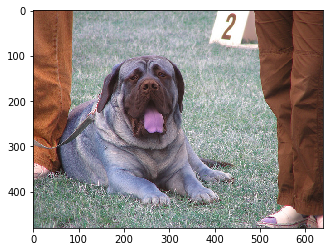

[60]
Breed-English cocker spaniel


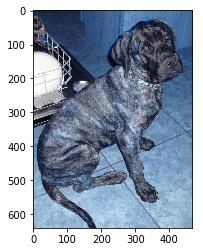

[55]
Breed-Dachshund


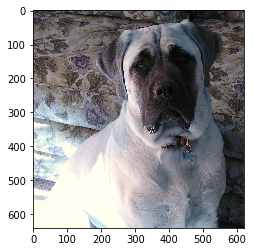

[60]
Breed-English cocker spaniel


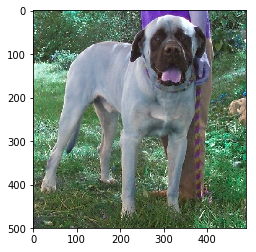

[55]
Breed-Dachshund


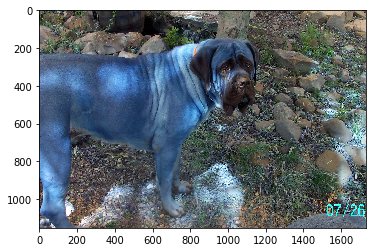

[60]
Breed-English cocker spaniel


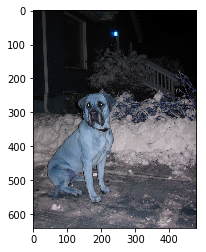

[60]
Breed-English cocker spaniel


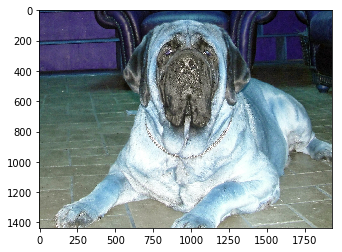

[60]
Breed-English cocker spaniel


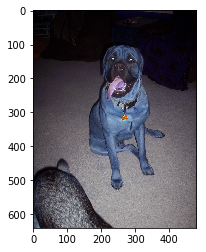

[60]
Breed-English cocker spaniel


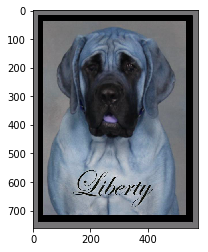

[60]
Breed-English cocker spaniel


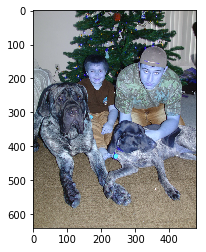

[55]
Breed-Dachshund


In [33]:
import matplotlib.pyplot as plt
import cv2
for images in dog_files_short:
    img = cv2.imread(images)
    plt.imshow(img)
    plt.show()
    i=predict_breed_transfer(images)
    print(i)
    print("Breed-" + class_names[i.item()])

In [20]:
class_names[1]

'Afghan hound'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

Number of faces detected: 1


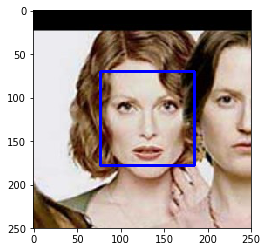

In [34]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[40])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [35]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [36]:
def notdog_predictor(img_path):
    if(VGG16_predict(img_path)>=151) and (VGG16_predict(img_path)<=268):
            return False
    return True

In [50]:
if(VGG16_predict('parachute.jpg')>=151):
     if(VGG16_predict('parachute.jpg')<=268):
    print(VGG16_predict('parachute.jpg'))

In [43]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if(notdog_predictor(img_path)):
        print("Neither a dog nor a human")
        img = cv2.imread(img_path)
        plt.imshow(img)
        plt.show()
    else:
        if(face_detector(img_path)):
            print("Hello Human")
            img = cv2.imread(img_path)
            plt.imshow(img)
            plt.show()
            i=predict_breed_transfer(img_path)
            print("Oh you resemble this dog breed-" + class_names[i.item()])
        else:
            img = cv2.imread(img_path)
            plt.imshow(img)
            plt.show()
            i=predict_breed_transfer(img_path)
            print("dog detected")
            print(VGG16_predict(img_path))
            print("breed-" + class_names[i.item()]) 
    
    


Neither a dog nor a human


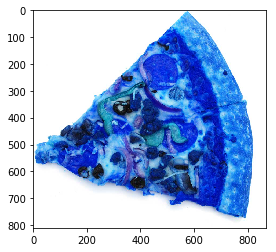

In [44]:
run_app('pizza-slice.jpg')

Hello Human


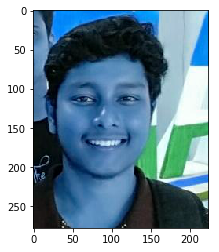

Oh you resemble this dog breed-Basenji


In [31]:
run_app('tara.jpeg')

Hello Human


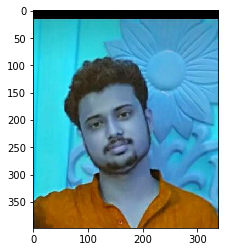

Oh you resemble this dog breed-Basenji


In [32]:
run_app('arka.jpeg')

Hello Human


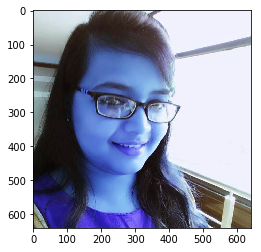

Oh you resemble this dog breed-Chihuahua


In [33]:
run_app('tanoo.jpeg')

Hello Human


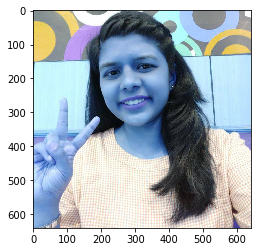

Oh you resemble this dog breed-English cocker spaniel


In [34]:
run_app('saloni.jpeg')

Hello Human


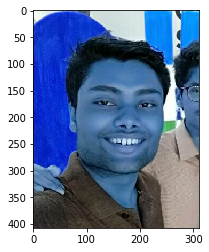

Oh you resemble this dog breed-Basenji


In [35]:
run_app('s.jpeg')

Hello Human


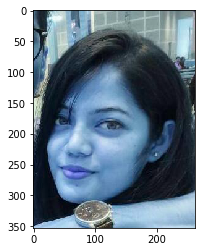

Oh you resemble this dog breed-Alaskan malamute


In [36]:
run_app('ani.jpeg')

Hello Human


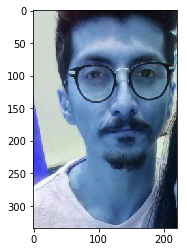

Oh you resemble this dog breed-Italian greyhound


In [37]:
run_app('rudra.jpeg')

Hello Human


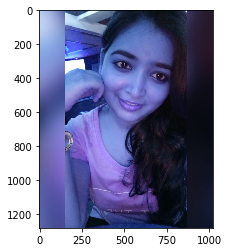

Oh you resemble this dog breed-Bearded collie


In [38]:
run_app('manisha2.jpeg')

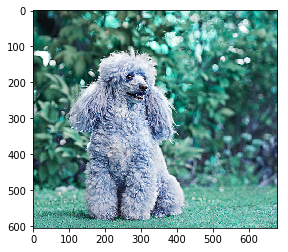

dog detected
breed-Poodle


In [39]:
run_app('poodle.jpg')

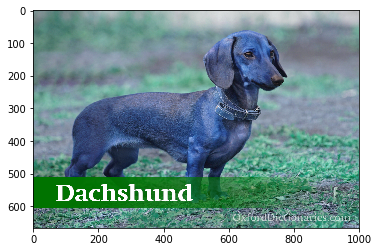

dog detected
breed-Dogue de bordeaux


In [40]:
run_app('Dachshund.png')

Hello Human


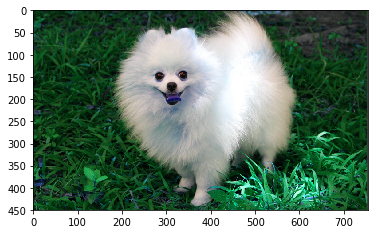

Oh you resemble this dog breed-Pomeranian


In [41]:
run_app('Pomeranian-Puppy.jpg')

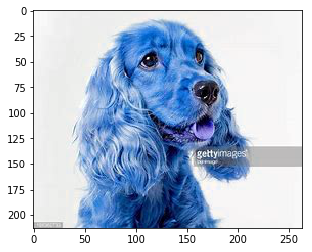

dog detected
breed-English cocker spaniel


In [42]:
run_app('cocker_spaniel.jpg')

In [ ]:
run_app('spaniel_ruby.jpeg')

Neither a dog nor a human


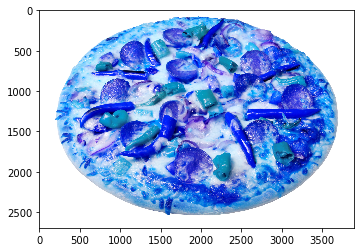

In [45]:
run_app('pizza.jpg')

Neither a dog nor a human


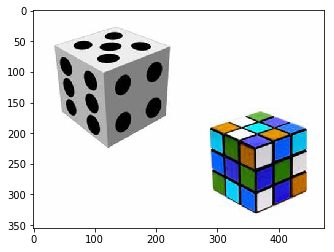

In [46]:
run_app('rubiks_cube.jpg')

Neither a dog nor a human


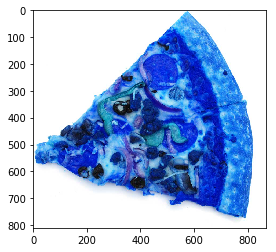

In [47]:
run_app('pizza-slice.jpg')

Neither a dog nor a human


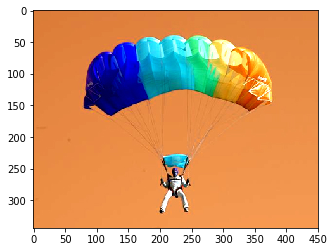

In [48]:
run_app('parachute.jpg')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output is pretty good I must say.
But the model is not the best.It is not predicting 100% accurately the dog breeds.

The 3 possible points for improvement is-
1. Test accuracy of my model is just at 88%. I can train the model further for more epoches or tune the hyperparameters to get an increased accuracy.

2. The algorithm is not correctly identifying all the human faces as humans. It is sometimes taking a human as a dog and displaying its breed. So I can work upon the proper human detection.

3. Result on predicting dog breeds is also not fully accurate. It cannot distinguish between very similar looking dogs and if there are multiple dogs in the image or if there is both a human and a dog in the image. The algorithm is not ready to handle these cases yet. Also, I can deploy this algorithm in a mobile app and improve its user experience.

Hello Human


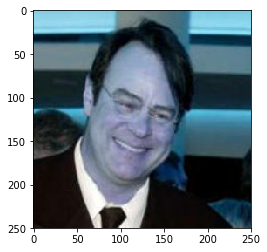

Oh you resemble this dog breed-Briard
Hello Human


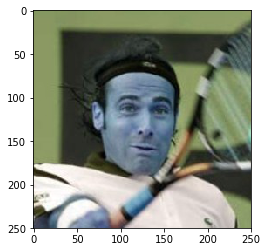

Oh you resemble this dog breed-American foxhound
Hello Human


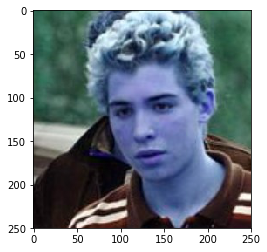

Oh you resemble this dog breed-Poodle


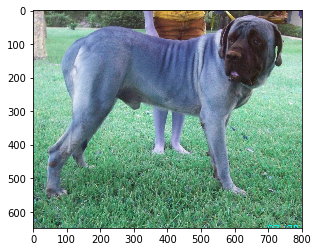

dog detected
breed-Mastiff


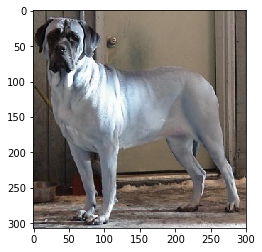

dog detected
breed-Mastiff


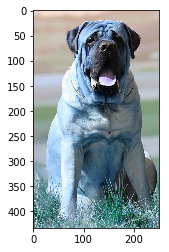

dog detected
breed-Mastiff


In [43]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [28]:
files1 = np.array(glob("*.jpg")) #containing the dog images
files2 = np.array(glob("human/*.jpeg")) #contining the human images

Hello Human


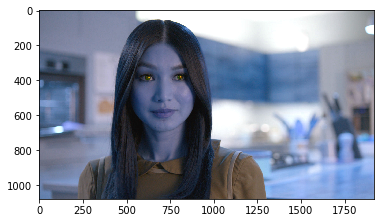

Oh you resemble this dog breed-Maltese
Hello Human


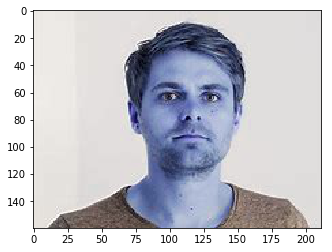

Oh you resemble this dog breed-Xoloitzcuintli
Hello Human


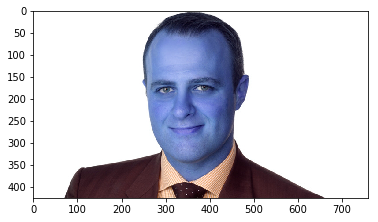

Oh you resemble this dog breed-Italian greyhound


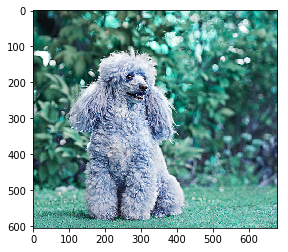

dog detected
breed-Poodle


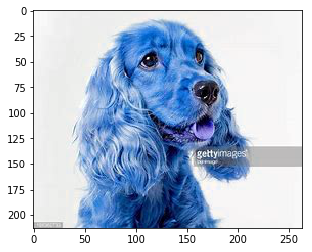

dog detected
breed-English cocker spaniel
Hello Human


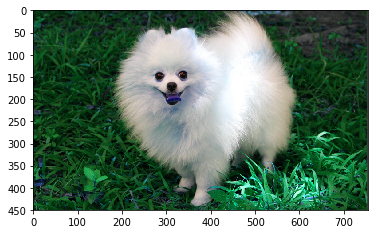

Oh you resemble this dog breed-Pomeranian


In [29]:
for i in range(len(files1)):
    run_app(files1[i])

Hello Human


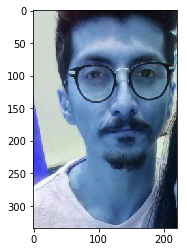

Oh you resemble this dog breed-Italian greyhound
Hello Human


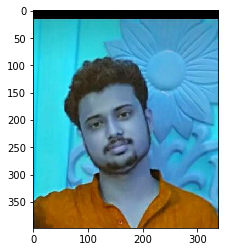

Oh you resemble this dog breed-Basenji
Hello Human


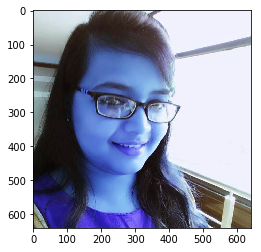

Oh you resemble this dog breed-Chihuahua
Hello Human


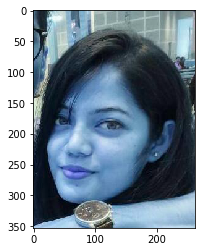

Oh you resemble this dog breed-Alaskan malamute
Hello Human


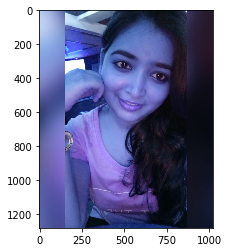

Oh you resemble this dog breed-Bearded collie
Hello Human


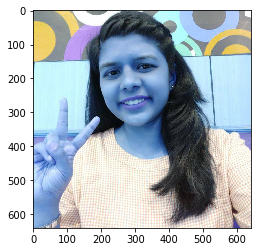

Oh you resemble this dog breed-English cocker spaniel


In [30]:

for i in range(len(files2)):
    run_app(files2[i])

Neither a dog nor a human


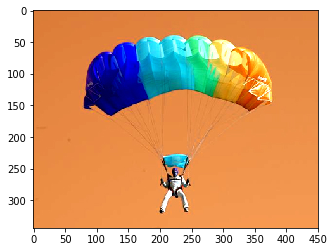

In [49]:
run_app('parachute.jpg')

Neither a dog nor a human


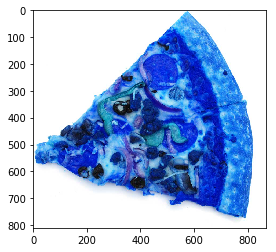

In [50]:
run_app('pizza-slice.jpg')